In [ ]:
import zipfile
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
  zip_ref.extractall("")

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Image Feature Extraction

Represent an image as a vector of real values

## Pixel values itself as an image descriptor

In [ ]:
img = cv2.imread("./data/flower.jpg",0)
features = img.ravel()
print(features)

## Mean of RGB values as a color descriptor

In [ ]:
img1 = cv2.imread("./data/Apple.png")
img1 = cv2.cvtColor( img1,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img1)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img2 = cv2.imread("./data/strawberry.jpg")
img2 = cv2.cvtColor( img2,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img2)
features = np.array((channels[0], channels[1], channels[2]))
print(features)
img3 = cv2.imread("./data/grapes.jpg")
img3 = cv2.cvtColor( img3,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img3)
features = np.array((channels[0], channels[1], channels[2]))
print(features)
plt.subplot(131), plt.imshow(img1)
plt.subplot(132), plt.imshow(img2)
plt.subplot(133), plt.imshow(img3)

## Intensity invariant feature descriptors

In [ ]:
img1 = cv2.imread("./data/intens1.png")
img2 = cv2.imread("./data/intens2.png")
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)

In [ ]:

img_1_rgb = cv2.cvtColor( img1,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img_1_rgb)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img_2_rgb = cv2.cvtColor( img2,cv2.COLOR_BGR2RGB)
channels = cv2.mean(img_2_rgb)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

In [ ]:

img_1_lab = cv2.cvtColor( img1,cv2.COLOR_BGR2LAB)
channels = cv2.mean(img_1_lab)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

img_2_lab = cv2.cvtColor( img2,cv2.COLOR_BGR2LAB)
channels = cv2.mean(img_2_lab)
features = np.array((channels[0], channels[1], channels[2]))
print(features)

# Shape Based Feature Descriptors

In [ ]:
img1 = cv2.imread("./data/brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("./data/brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))

plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)
plt.show()

img1_gray = cv2.cvtColor( img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor( img2,cv2.COLOR_BGR2GRAY)


ret,t_img1 = cv2.threshold(img1_gray,160,255,cv2.THRESH_BINARY)
ret,t_img2 = cv2.threshold(img2_gray,160,255,cv2.THRESH_BINARY)

plt.subplot(121), plt.imshow(t_img1)
plt.subplot(122), plt.imshow(t_img2)
plt.show()

kernel = np.ones((5,5),np.uint8)
t_img1 = cv2.morphologyEx(t_img1, cv2.MORPH_OPEN, kernel)
t_img2 = cv2.morphologyEx(t_img2, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(t_img1)
plt.subplot(122), plt.imshow(t_img2)
plt.show()

In [ ]:
f1=[]
f2=[]

contours1,hierarchy = cv2.findContours(t_img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]
contours2,hierarchy = cv2.findContours(t_img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours2[0]

area1 = cv2.contourArea(cnt1)
print(area1)
f1.append(area1)

area2 = cv2.contourArea(cnt2)
print(area2)
f2.append(area2)

perimeter1 = cv2.arcLength(cnt1,True)
print(perimeter1)
f1.append(perimeter1)

perimeter2 = cv2.arcLength(cnt2,True)
print(perimeter2)
f2.append(perimeter2)


In [ ]:
img1 = cv2.imread("./data/brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("./data/brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))

x,y,w,h = cv2.boundingRect(cnt1)
print(w,h)
f1.extend([w,h])
rimg_1 = cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

x,y,w,h = cv2.boundingRect(cnt2)
print(w,h)
f2.extend([w,h])
rimg_2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

plt.subplot(121), plt.imshow(rimg_1)
plt.subplot(122), plt.imshow(rimg_2)
plt.show()


In [ ]:
img1 = cv2.imread("./data/brain1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("./data/brain2.jpg",cv2.IMREAD_COLOR)

img1 = cv2.resize(img1,(150,150))
img2 = cv2.resize(img2,(150,150))
(x,y),radius = cv2.minEnclosingCircle(cnt1)
center = (int(x),int(y))
radius = int(radius)
print(x,y,radius)
f1.append(radius)
cimg_1 = cv2.circle(img1,center,radius,(255,0,0),2)


(x,y),radius = cv2.minEnclosingCircle(cnt2)
center = (int(x),int(y))
radius = int(radius)
print(x,y,radius)
f2.append(radius)
cimg_2 = cv2.circle(img2,center,radius,(255,0,0),2)
plt.subplot(121), plt.imshow(cimg_1)
plt.subplot(122), plt.imshow(cimg_2)
plt.show()

In [ ]:
print(f1)
print(f2)

In [ ]:
moments = cv2.moments(t_img1)
huMoments = cv2.HuMoments(moments)
print(huMoments.ravel())


In [ ]:
moments = cv2.moments(t_img2)
huMoments = cv2.HuMoments(moments)
print(huMoments.ravel())



---

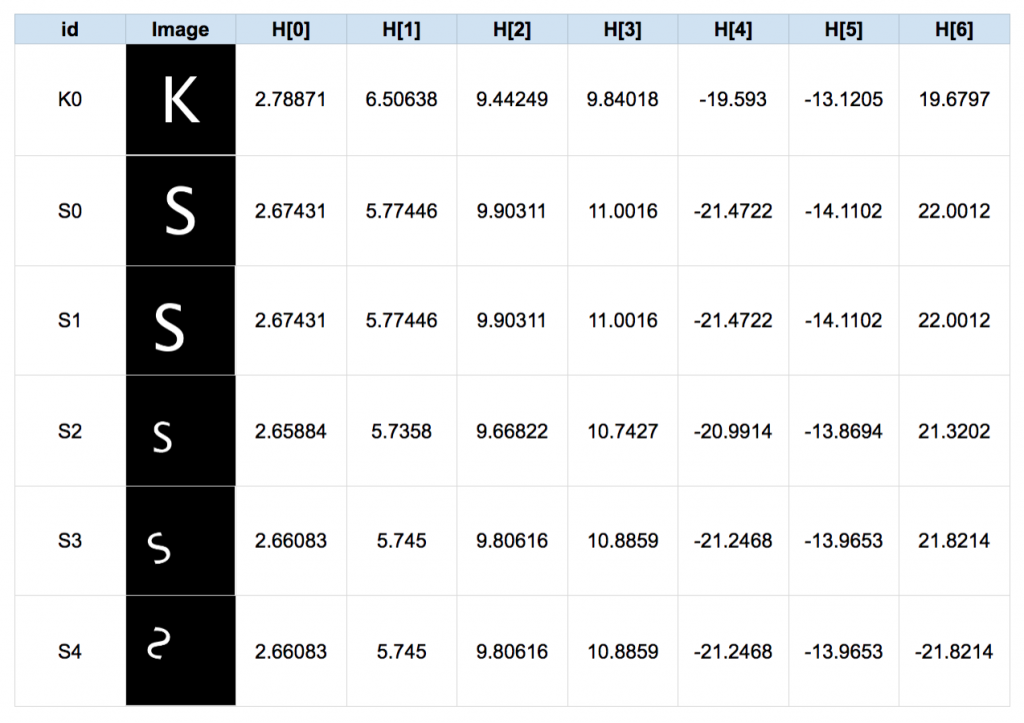